In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bitcoin_2010-07-27_2024-04-25.csv")

In [3]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.5400,67070.4000,63742.7300,64291.0700,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.0200,67174.0200,65884.1500,66386.6100,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.0200,67180.0300,64598.0000,66818.8900,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.7500,65638.7400,64302.4700,64896.8700,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.0600,65351.3300,63321.1900,64857.9900,1.537410e+11,1.263725e+12
...,...,...,...,...,...,...,...,...
5016,2010-07-31,2010-08-01,0.0679,0.0679,0.0679,0.0679,0.000000e+00,0.000000e+00
5017,2010-07-30,2010-07-31,0.0627,0.0627,0.0627,0.0627,0.000000e+00,0.000000e+00
5018,2010-07-29,2010-07-30,0.0699,0.0699,0.0699,0.0699,0.000000e+00,0.000000e+00
5019,2010-07-28,2010-07-29,0.0589,0.0589,0.0589,0.0589,0.000000e+00,0.000000e+00


In [4]:
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       5021 non-null   object 
 1   End         5021 non-null   object 
 2   Open        5021 non-null   float64
 3   High        5021 non-null   float64
 4   Low         5021 non-null   float64
 5   Close       5021 non-null   float64
 6   Volume      5021 non-null   float64
 7   Market Cap  5021 non-null   float64
dtypes: float64(6), object(2)
memory usage: 313.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5021.0,1.116960e+04,1.644024e+04,0.057,2.297050e+02,2.398840e+03,1.653745e+04,7.296103e+04
High,5021.0,1.143190e+04,1.682973e+04,0.057,2.327050e+02,2.515270e+03,1.678589e+04,7.362843e+04
Low,5021.0,1.089434e+04,1.602569e+04,0.057,2.262200e+02,2.296810e+03,1.606517e+04,7.133336e+04
Close,5021.0,1.118360e+04,1.645983e+04,0.057,2.296890e+02,2.401800e+03,1.654998e+04,7.308795e+04
Volume,5021.0,2.034638e+10,3.260079e+10,0.000,6.755427e+06,9.920291e+08,3.281635e+10,2.121515e+11
Market Cap,5021.0,2.097941e+11,3.149496e+11,0.000,3.275508e+09,3.958854e+10,3.091939e+11,1.428493e+12


In [7]:
df.isna().sum()

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

## Volatility Clustering

In [106]:
df['Volume'] = df['Volume'].replace(0, df['Volume'].median())
df['Volume']

16      0.250545
17      0.182236
18      0.226409
19      0.308408
21      0.342593
          ...   
5016    0.004663
5017    0.004663
5018    0.004663
5019    0.004663
5020    0.004663
Name: Volume, Length: 4835, dtype: float64

In [10]:
df['Volatility'] = df['High']-df['Low']
df['Impact'] = df['Volatility']/df['Volume']

In [11]:
df['Volatility']

0       3327.67
1       1289.87
2       2582.03
3       1336.27
4       2030.14
         ...   
5016       0.00
5017       0.00
5018       0.00
5019       0.00
5020       0.00
Name: Volatility, Length: 5021, dtype: float64

In [12]:
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap,Volatility,Impact
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12,3327.67,2.403108e-08
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12,1289.87,9.156968e-09
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12,2582.03,1.843352e-08
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12,1336.27,1.007309e-08
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12,2030.14,1.320493e-08


In [13]:
df['Rolling_std'] = df['Close'].rolling(window=7).std() #7-day rolling std deviation

In [14]:
df.isna().sum()

Start          0
End            0
Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap     0
Volatility     0
Impact         0
Rolling_std    6
dtype: int64

In [15]:
df.head(12)

,Start,End,Open,High,Low,Close,Volume,Market Cap,Volatility,Impact,Rolling_std
0,2024-04-24,2024-04-25,66553.54,67070.40,63742.73,64291.07,1.384736e+11,1.294489e+12,3327.67,2.403108e-08,NaN
1,2024-04-23,2024-04-24,66761.02,67174.02,65884.15,66386.61,1.408621e+11,1.308576e+12,1289.87,9.156968e-09,NaN
2,2024-04-22,2024-04-23,64952.02,67180.03,64598.00,66818.89,1.400725e+11,1.299703e+12,2582.03,1.843352e-08,NaN
3,2024-04-21,2024-04-22,64875.75,65638.74,64302.47,64896.87,1.326574e+11,1.278730e+12,1336.27,1.007309e-08,NaN
4,2024-04-20,2024-04-21,63824.06,65351.33,63321.19,64857.99,1.537410e+11,1.263725e+12,2030.14,1.320493e-08,NaN
5,2024-04-19,2024-04-20,63286.00,65384.60,59734.42,63965.95,1.796266e+11,1.254719e+12,5650.18,3.145515e-08,NaN
6,2024-04-18,2024-04-19,61386.44,64049.91,60896.00,63418.00,1.622083e+11,1.228285e+12,3153.91,1.944358e-08,1246.155647
7,2024-04-17,2024-04-18,63719.72,64409.61,60035.04,61309.97,1.592861e+11,1.230614e+12,4374.57,2.746360e-08,1864.181466
8,2024-04-16,2024-04-17,63464.02,64279.61,61721.75,63679.78,1.648191e+11,1.239607e+12,2557.86,1.551920e-08,1685.087127
9,2024-04-15,2024-04-16,65437.82,66716.61,62664.83,63496.91,1.672004e+11,1.278738e+12,4051.78,2.423308e-08,1201.861276


In [16]:
df[['Rolling_std','Impact']] = df[['Rolling_std','Impact']].fillna(df[['Rolling_std','Impact']].median())

In [17]:
df.isna().sum()

Start          0
End            0
Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap     0
Volatility     0
Impact         0
Rolling_std    0
dtype: int64

In [18]:
df.drop_duplicates(inplace=True)  

In [19]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [20]:
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(pd.to_numeric)

In [21]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

In [22]:
scaler = MinMaxScaler()
df[['Volatility','Volume']] = scaler.fit_transform(df[['Volatility','Volume']])

In [23]:
df = df.drop(columns=['Market Cap'])

In [24]:
df = df[(np.abs(zscore(df[['Volatility','Volume']]))<3).all(axis=1)]

In [25]:
#df = df.replace([np.inf , -np.inf],0)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Start,4835,2017-04-06 12:40:39.214064128,2010-07-27 00:00:00,2013-11-16 12:00:00,2017-03-09 00:00:00,2020-07-04 12:00:00,2024-04-08 00:00:00,NaN
End,4835,2017-04-07 12:40:39.214064128,2010-07-28 00:00:00,2013-11-17 12:00:00,2017-03-10 00:00:00,2020-07-05 12:00:00,2024-04-09 00:00:00,NaN
Open,4835.0,9734.195652,0.057,219.3075,1120.54,11319.552017,72263.99,14760.902103
High,4835.0,9936.798135,0.057,225.9145,1156.12,11550.967209,73607.76,15054.657235
Low,4835.0,9538.278428,0.057,214.3325,1077.25,11006.277457,71333.36,14489.929478
Close,4835.0,9753.113013,0.057,219.6145,1124.33,11323.624125,73087.95,14796.68519
Volume,4835.0,0.079872,0.0,0.002035,0.004663,0.132355,0.555538,0.122657
Volatility,4835.0,0.03321,0.0,0.000327,0.004813,0.039794,0.296492,0.056337
Impact,4835.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0
Rolling_std,4835.0,332.537504,0.0,3.808173,48.14951,373.419488,4858.227939,613.332689


In [26]:
df.isna().sum()

Start          0
End            0
Open           0
High           0
Low            0
Close          0
Volume         0
Volatility     0
Impact         0
Rolling_std    0
dtype: int64

# Market Liquidity Analysis

In [28]:
Correlation = df[['Volume','Volatility','Impact']].corr()
print(Correlation)

              Volume  Volatility    Impact
Volume      1.000000    0.796993 -0.239425
Volatility  0.796993    1.000000 -0.159384
Impact     -0.239425   -0.159384  1.000000


In [29]:
df['Price_to_Volume'] = df['Close']/df['Volume']

<Axes: title={'center': 'Volume vs Volatility'}, xlabel='Volume', ylabel='Volatility'>

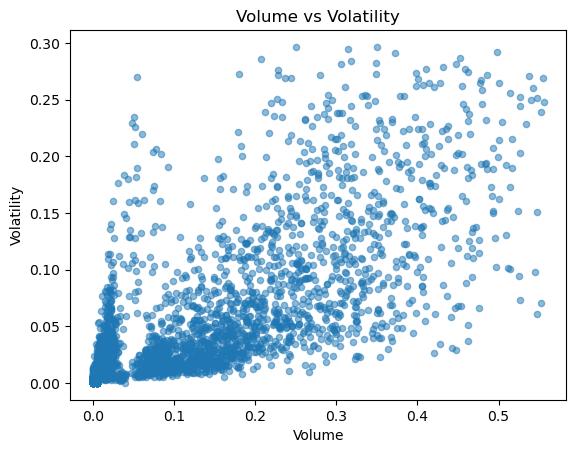

In [30]:
df.plot(x = "Volume",y="Volatility",kind = "scatter",title = "Volume vs Volatility",alpha = 0.5)

In [31]:
feature = df[['Volatility','Volume']]

## K-Means Clustring

In [33]:
from sklearn.cluster import KMeans

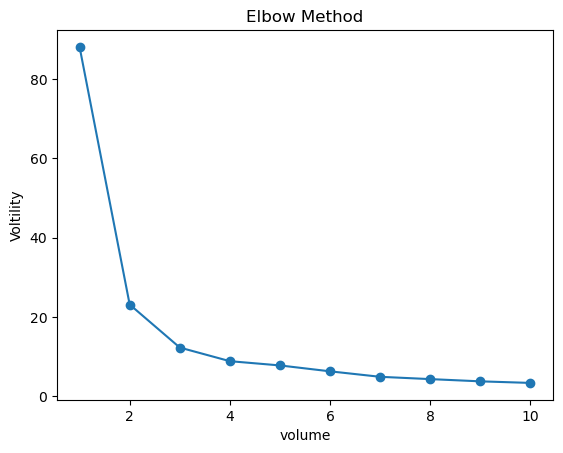

In [34]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters = i,random_state = 23)
    kmean.fit(feature)
    wcss.append(kmean.inertia_)
plt.plot(range(1,11),wcss,marker = "o")
plt.title("Elbow Method")
plt.xlabel("volume")
plt.ylabel("Voltility")
plt.show()

In [35]:
kmean = KMeans(n_clusters = 2,random_state = 23)
df['Cluster'] = kmean.fit_predict(feature)

In [36]:
print(kmean.cluster_centers_)

[[0.01160075 0.02288973]
 [0.11139266 0.28603275]]


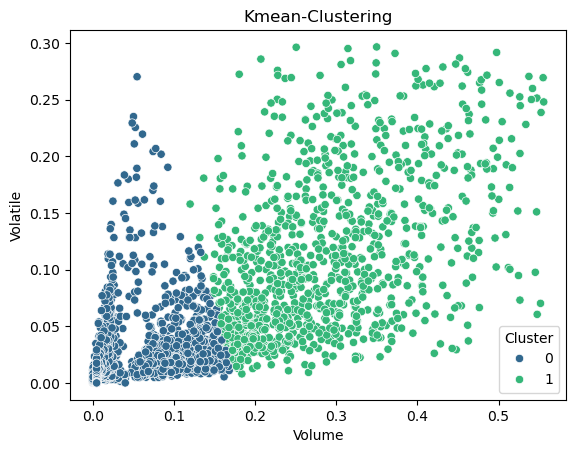

In [37]:
sns.scatterplot(x = 'Volume',y = 'Volatility',hue = 'Cluster',data = df,palette = 'viridis')
plt.title('Kmean-Clustering')
plt.xlabel('Volume')
plt.ylabel('Volatile')
plt.show()

In [38]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,Start,End,Open,High,Low,Close,Volume,Volatility,Impact,Rolling_std,Price_to_Volume
Cluster,,,,,,,,,,,
0,2015-11-09 12:21:51.163895296,2015-11-10 12:21:51.163895296,3424.773523,3494.273238,3355.017514,3430.520131,0.022928,0.011605,1.777138e-07,126.307098,inf
1,2022-05-12 11:22:49.789675008,2022-05-13 11:22:49.789674752,32589.263000,33274.013082,31936.343058,32655.889715,0.286146,0.111474,2.236540e-08,1079.580530,1.204567e+05


## Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import MinMaxScaler

In [41]:
X = df[['Volatility','Volume']]
y = df['Cluster']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 23)

In [43]:
X_train = pd.DataFrame(X_train)

y_train = pd.Series(y_train) 

In [44]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('rf', RandomForestClassifier(random_state=23))  
])


In [45]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf', RandomForestClassifier(random_state=23))])

In [46]:
y_pred = pipeline.predict(X_test)

In [47]:
accuracy= accuracy_score(y_test,y_pred)*100

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       747
           1       1.00      1.00      1.00       220

    accuracy                           1.00       967
   macro avg       1.00      1.00      1.00       967
weighted avg       1.00      1.00      1.00       967



In [112]:
print("The accuracy is : %0.2f"%(accuracy))
print(f"the accuracy is another formate is :{accuracy:.2f}")

The accuracy is : 99.90
the accuracy is another formate is :99.90


In [50]:
importances = pipeline.named_steps['rf'].feature_importances_
print("Feature Importance:", importances)

Feature Importance: [0.29545808 0.70454192]


## Cluster Analysis

In [52]:
cluster_0 = df[df['Cluster']==0]
cluster_1 = df[df['Cluster']==1]

In [53]:
cluster_0[cluster_0['Price_to_Volume']==np.inf].value_counts()

Start       End         Open     High     Low      Close    Volume  Volatility  Impact    Rolling_std  Price_to_Volume  Cluster
2014-05-18  2014-05-19  448.701  449.767  444.784  446.264  0.0     0.000415    0.000002  34.602928    inf              0          1
Name: count, dtype: int64

In [54]:
# cluster_0.to_csv('Cluster_0.csv',index = False)
# cluster_1.to_csv('Cluster_1.csv',index = False)
# df.to_csv('Bitcoin_Analysis.csv',index = False)